<a href="https://colab.research.google.com/github/jeonuenseo/eunseo/blob/master/10_2_and_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## XOR 이해하기

In [ ]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
tf.__version__

'2.2.0'

In [ ]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]

y_data = [[0],
          [0],
          [0],
          [1]]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [ ]:
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

In [ ]:
W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

In [ ]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [ ]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [ ]:
sess = tf.Session()

In [ ]:
sess.run(tf.global_variables_initializer())

In [ ]:
vcost =[]

In [ ]:
for step in range(10001):

    cost1, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
    vcost.append(cost1)
    if step %1000 ==0:
        
        print(cost1)

0.75422287
0.38436586
0.31431213
0.26809424
0.23461333
0.20895137
0.18850619
0.17175764
0.1577474
0.14583434
0.13557006


Text(0.5, 0, 'epoch')

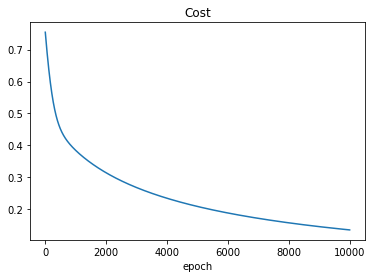

In [ ]:
plt.plot(vcost)
plt.title('Cost')
plt.xlabel('epoch')

In [ ]:
test1 = sess.run(hypothesis, feed_dict={X:[[0.1,0]]})

In [ ]:
print(test1[0][0])

0.009596332


In [ ]:
test1 = sess.run(hypothesis, feed_dict={X:[[0.1,0]]})